# Common clustering algorithm

Testing common clustering algorithm on a reduced dataset size:

- k-Nearest Neighbors
- DBSCAN
- TS-KMeans
- Hierarchical Clustering with DTW
- Gaussian Mixture Models (GMM)
- Shape-Based Clustering (K-Shape)
- Spectral Clustering with DTW

In [1]:
%pip install -U -qqq scikit-learn seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import math
import os
import pickle

from _defaults import (
    CACHING_ENABLED,
    SEED,
    get_data_hash_key,
    init_notebook,
    load_ballance_datasets,
    plot_clusters,
    print_db_length_table,
)
import matplotlib.pyplot as plt
import numpy as np

In [4]:
init_notebook()

Load (limited amount of) data.

In [5]:
data_limit = 100
_, (dataset, metadata, targets) = load_ballance_datasets(max_length=data_limit)

Load previous cached dataset from 'data/datasets-098bae95.pkl' file.


In [6]:
print_db_length_table(targets)

Dataset         Length
------------  --------
Fernverkehr        100
Güterzüge          100
Regioverkehr       100


## Clustering Methods

### Distance Matrix

In [9]:
from tslearn.metrics import cdist_dtw

In [ ]:
data_hash = get_data_hash_key()
cache_file = f"./cache/distance_matrix-{data_hash}-{data_limit}.pkl"

if CACHING_ENABLED and os.path.exists(cache_file):
    print(f"Load previous cached distance matrix from '{cache_file}' file.")
    with open(cache_file, "rb") as f:
        distance_matrix = pickle.load(f)
else:
    # compute the distance matrix using DTW
    distance_matrix = cdist_dtw(dataset, n_jobs=-1)
    if CACHING_ENABLED:
        with open(cache_file, "wb") as f:
            pickle.dump(distance_matrix, f)

In [11]:
n_clusters = math.ceil(math.sqrt(len(dataset)))
print(n_clusters)

18


### Multidimensional Scaling (MDS)

In [12]:
from sklearn.manifold import MDS

In [13]:
# Define the MDS model
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=SEED)
mds_transformed = mds.fit_transform(distance_matrix)

/home/hein_f0/dev/slki-code/.venv/lib/python3.10/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


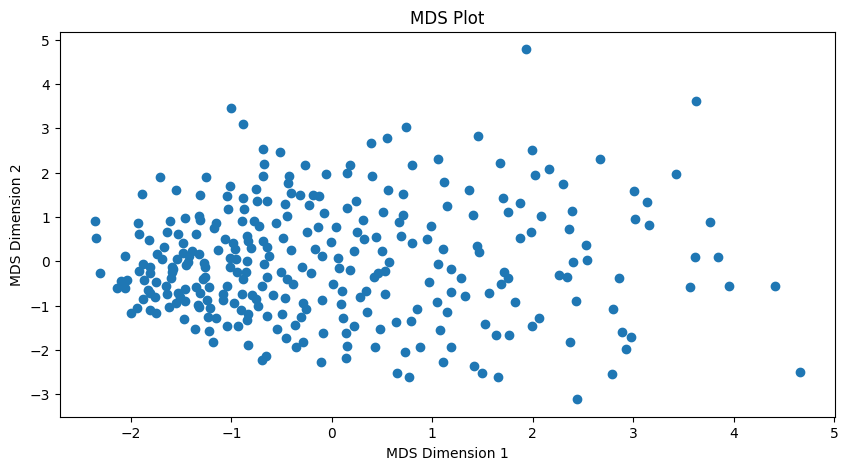

In [14]:
# Plot the MDS result
plt.figure(figsize=(10, 5))
plt.scatter(mds_transformed[:, 0], mds_transformed[:, 1])
plt.title("MDS Plot")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.show()

### t-SNE

In [15]:
from sklearn.manifold import TSNE

In [16]:
# Define the t-SNE model
tsne = TSNE(n_components=2, metric="precomputed", random_state=SEED, init="random")
tsne_transformed = tsne.fit_transform(distance_matrix)

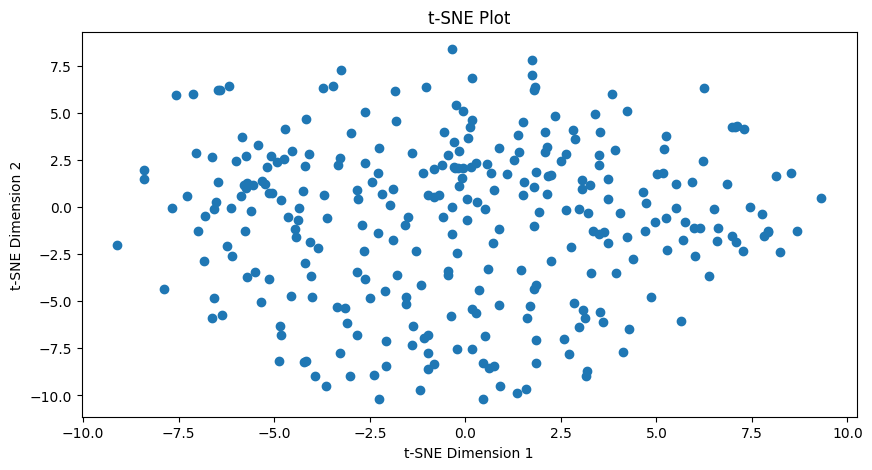

In [17]:
# Plot the t-SNE result
plt.figure(figsize=(10, 5))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1])
plt.title("t-SNE Plot")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

### Heatmap

In [18]:
import seaborn as sns

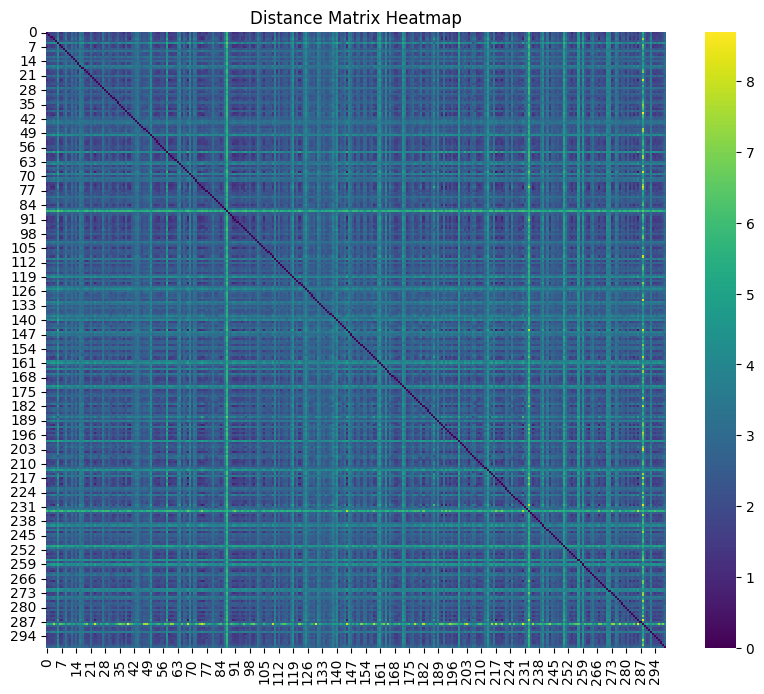

In [19]:
# Plot the heatmap of the distance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix, cmap="viridis")
plt.title("Distance Matrix Heatmap")
plt.show()

### k-Nearest Neighbors

In [20]:
from sklearn.neighbors import NearestNeighbors

In [21]:
# Compute the k-nearest neighbors distances
k = 4  # min_samples parameter
nearest_neighbors = NearestNeighbors(n_neighbors=k)
nearest_neighbors.fit(distance_matrix)
distances, indices = nearest_neighbors.kneighbors(distance_matrix)

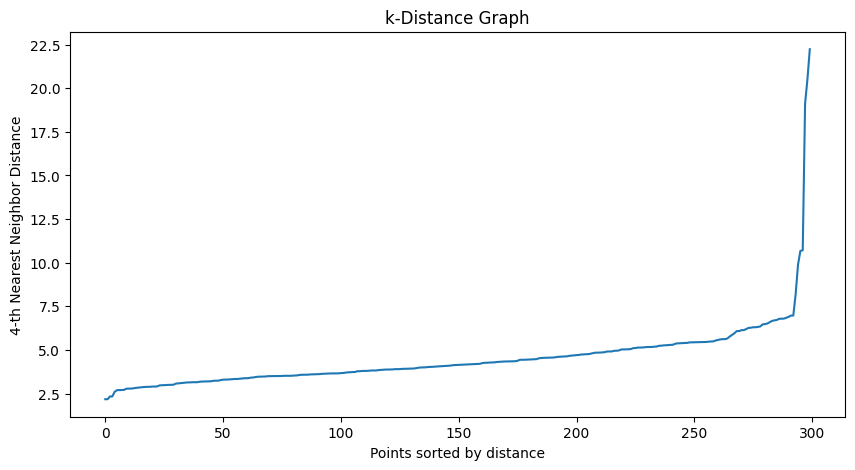

In [22]:
# Sort distances and plot
distances = np.sort(distances[:, k - 1], axis=0)
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{k}-th Nearest Neighbor Distance")
plt.title("k-Distance Graph")
plt.show()

### DBSCAN

In [23]:
from sklearn.cluster import DBSCAN

In [24]:
# Define the DBSCAN model
dbscan = DBSCAN(eps=1.5, min_samples=5, metric="precomputed", n_jobs=-1)

# Fit the model
clusters = dbscan.fit_predict(distance_matrix)

# Output the cluster labels
print("Cluster labels:", clusters)

Cluster labels: [ 0  0  0  0 -1 -1  0  0 -1 -1  0  0 -1 -1 -1  0 -1 -1  0  0  0 -1 -1  0
  0 -1  0 -1 -1  0 -1 -1  0 -1 -1  0  0  0 -1  0  0 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  0  0  0 -1 -1  0 -1  0  0  0  0 -1 -1  0 -1 -1  0 -1 -1 -1
 -1  0  0  0  0  0 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0  0  0 -1  0  0
  0 -1 -1  0  0 -1 -1 -1 -1  0 -1 -1 -1  0 -1  0 -1  0 -1 -1 -1  0 -1 -1
 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1
 -1  0 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1  0  0 -1 -1 -1 -1 -1  0 -1 -1
  0  0 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  0  0
 -1  0 -1  0 -1  0  0 -1 -1 -1 -1 -1  0 -1 -1 -1  0  0  0 -1 -1 -1 -1  0
 -1  0  0  0  0  0 -1 -1  0 -1 -1 -1  0  0  0 -1 -1 -1 -1  0  0 -1  0 -1
 -1 -1 -1  0 -1 -1 -1 -1  0 -1 -1 -1 -1  0  0 -1  0 -1 -1 -1 -1  0  0 -1
 -1 -1 -1  0 -1 -1  0 -1 -1  0 -1 -1 -1  0 -1 -1  0 -1  0 -1  0 -1  0 -1
 -1 -1  0 -1 -1  0  0  0  0  0 -1 -1]


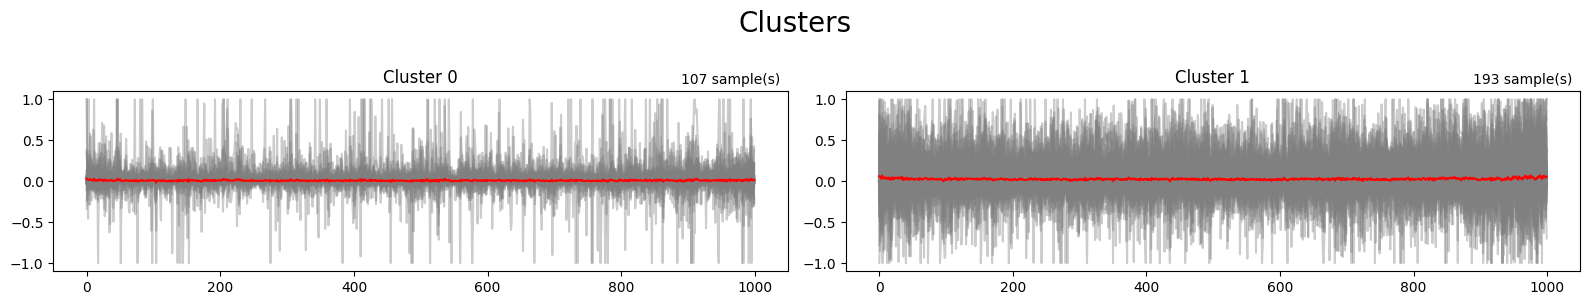

In [ ]:
plot_clusters(clusters, dataset)

### TS-KMeans

In [26]:
from tslearn.clustering import TimeSeriesKMeans

In [27]:
# Define the TSKMeans model
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=SEED, n_jobs=-1)

# Fit the model
clusters = model.fit_predict(dataset)

# Output the cluster labels
print("Cluster labels:", clusters)

/home/hein_f0/dev/slki-code/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hein_f0/dev/slki-code/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Cluster labels: [ 3  3 12 12 10  8 10  3 10  4  2 10  6  8  6  3  4  6  8  3  3 15 10  3
 10  8 12  4  6 12  6 15 10  3  8 10  3  3  8  3 12  6  1  4  6  6 15 10
  2  6 14 10 10  3  3  1 15  3  4  3 10 10  3  9  9 12  6 15  3  4  3  4
  6  3  3 12 12  8  6 15  4 15  8 10 12  6  6 17 15 10  3  3  3 10 12  3
  3 10 10 10  3 10  0  4 15  3  1  1  8  2  4  8  4  8  8 15 10 15  4  9
  8  6  3  8  9  7  9 15 15 15 10  4  6 15  1  6 15  1  1  4  9  2  8  8
  8  3  9  4 10 10  8  4 10  6  4  3  1  6 12  3  5  5  8 10  4  3  1 15
  3 15 10 10 13  4  3 10  8  6  3 10  8 15  3 15  8  3  6  8  8  9 15 12
  9 12  8  3 12 10  3  7 10  6  2  6  3  6  8  8  8  3 12  8  4  4  8 12
  4  3 10 12  3  8  4 15 12  8 15 10 15  3 12  8  4  0  8 12 10 10 15  6
  4  8  6  3  6  4 10  6 10 15 11  4 15 10  3 10  2 13 15  9  8 10 12  1
  8 15  8 12  8  8  3  9  9  3 12 14  4 12  4 15  3 15 12  2 12  8  3  6
 16  6 10  3  4  3 10 15  3 10 10  4]


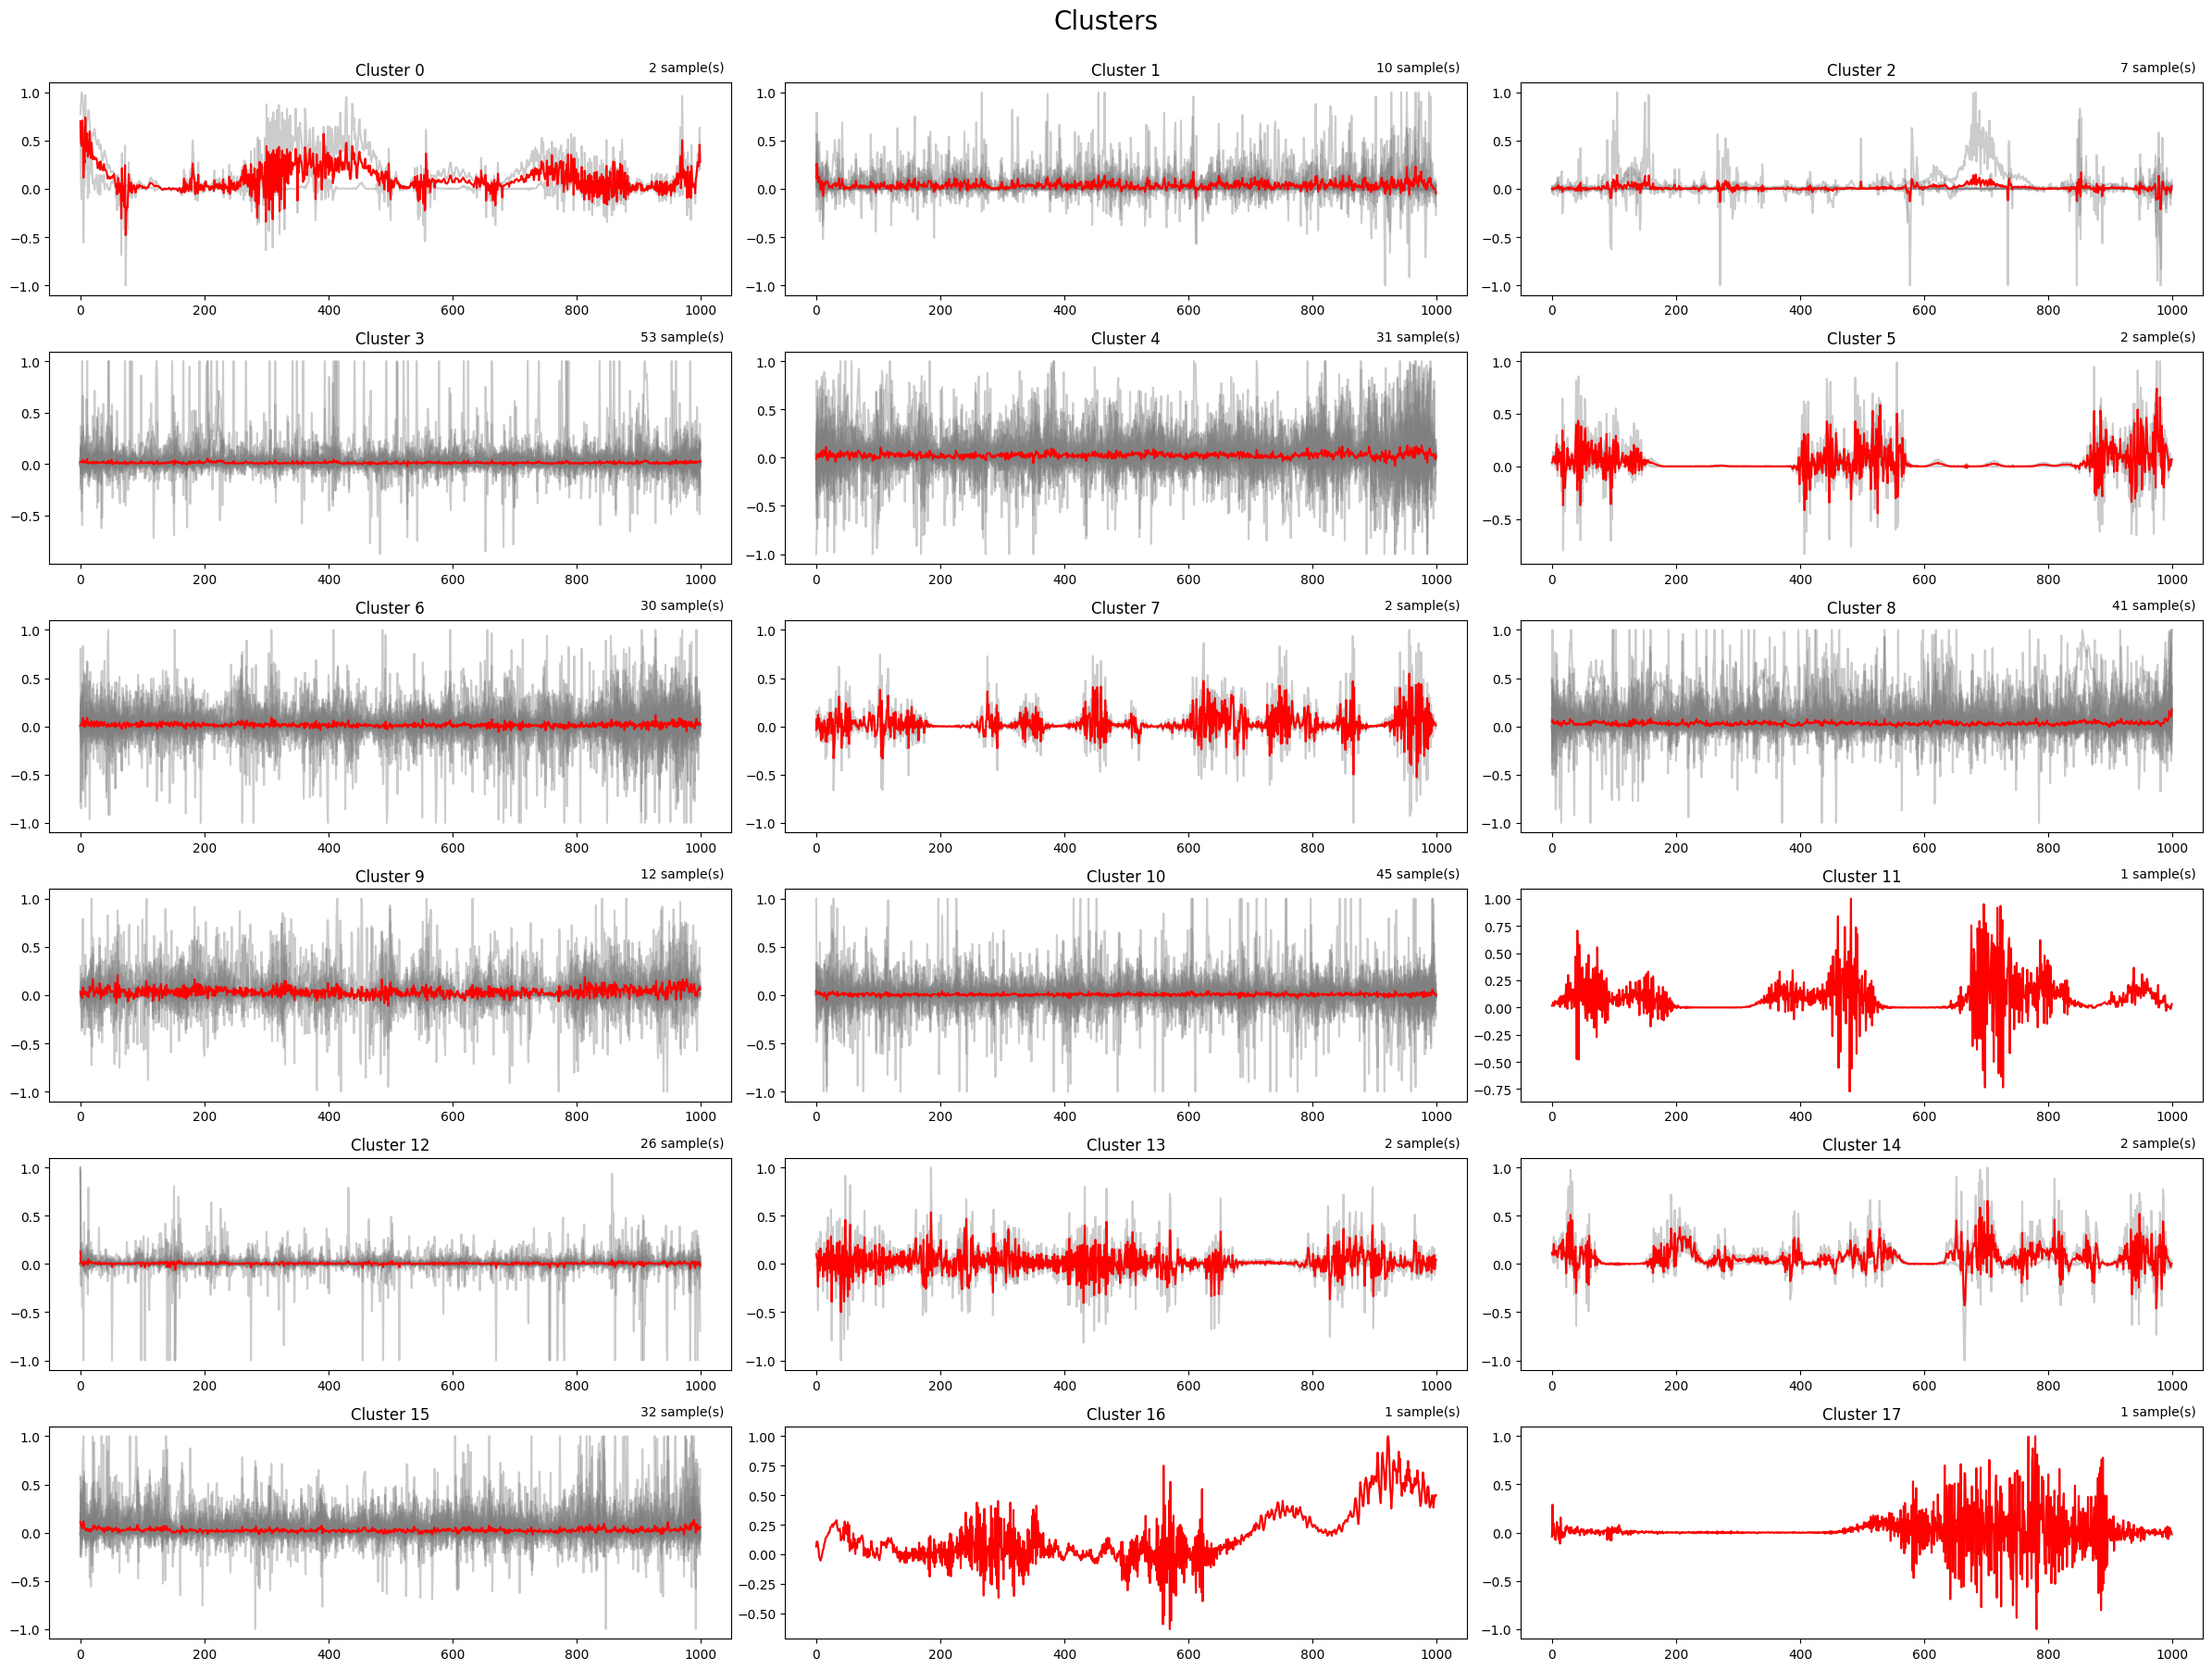

In [ ]:
plot_clusters(clusters, dataset)

### Hierarchical Clustering with DTW

In [29]:
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage

In [30]:
# Perform hierarchical clustering
Z = linkage(distance_matrix, method="ward")

/tmp/ipykernel_784724/3784211639.py:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method="ward")


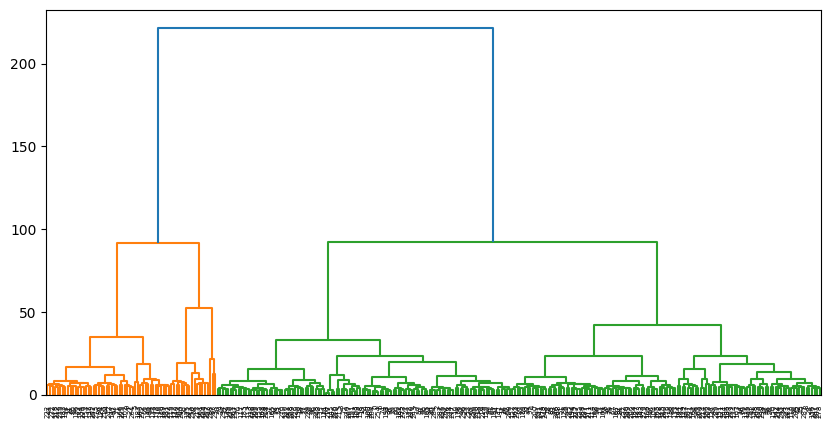

In [31]:
# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

In [32]:
# Determine clusters (e.g., using a threshold)
max_d = 10  # Maximum distance for defining clusters
clusters = fcluster(Z, max_d, criterion="distance")

In [33]:
# Output the cluster labels
print("Cluster labels:", clusters)

Cluster labels: [16 12 18 15 20  4 16 17 28  3 19 19  1 21 26 13  5  1 13 16 12  1 20 17
 12 21 19  3 28 19 28 22 12 13 28 19 13 16 24 17 18 27 28  1  2 28 23 27
 27 26  6 21 19 12 16 22 21 12  7 17 17 19 19  2  5 19 26 22 14  5 12  2
  1 12 16 15 18 13 21 22  1 22 22 21 18 21  2  9 23 20 17 17 12 20 19 16
 13 20 28 19 16 21  3 26 23 17 23 23 21 15  5 13 26 12 21 23 28 12  1  6
 13 26 17 21  2  6  1 22 23 24 27  5  1 23 26 27 23 24  5  1  6 19 28 22
 24 14  5  2 27 12 28 26 20  1  1 12 28 26 15 19  5  7 24 20  6 12  3 22
 12 12 20 21  6  5 12 21 23 26 19 20 22 24 17 22 22 12 26  4 21  5 13 15
  1 15 21 17 25 19 16  7 20 28 25 27 16 28 25 24 12 19 15 21  1  7 25 15
  2 14 19 19 17 13  1 28 18  3 13 21 13 13 15 24  1 10 28 18 12 21 12  1
  6 20  2 17 26 28 21 28 20 22  8  2 22 19 16 21 19  7 13  7 23 12 18 24
  3 23 22 15 21 13 12  6  5 17 20  2  1 18 28 22 16 28 18 27 18 21 14 28
 11 26 19 20  5 13 12 12 19 12 27 26]


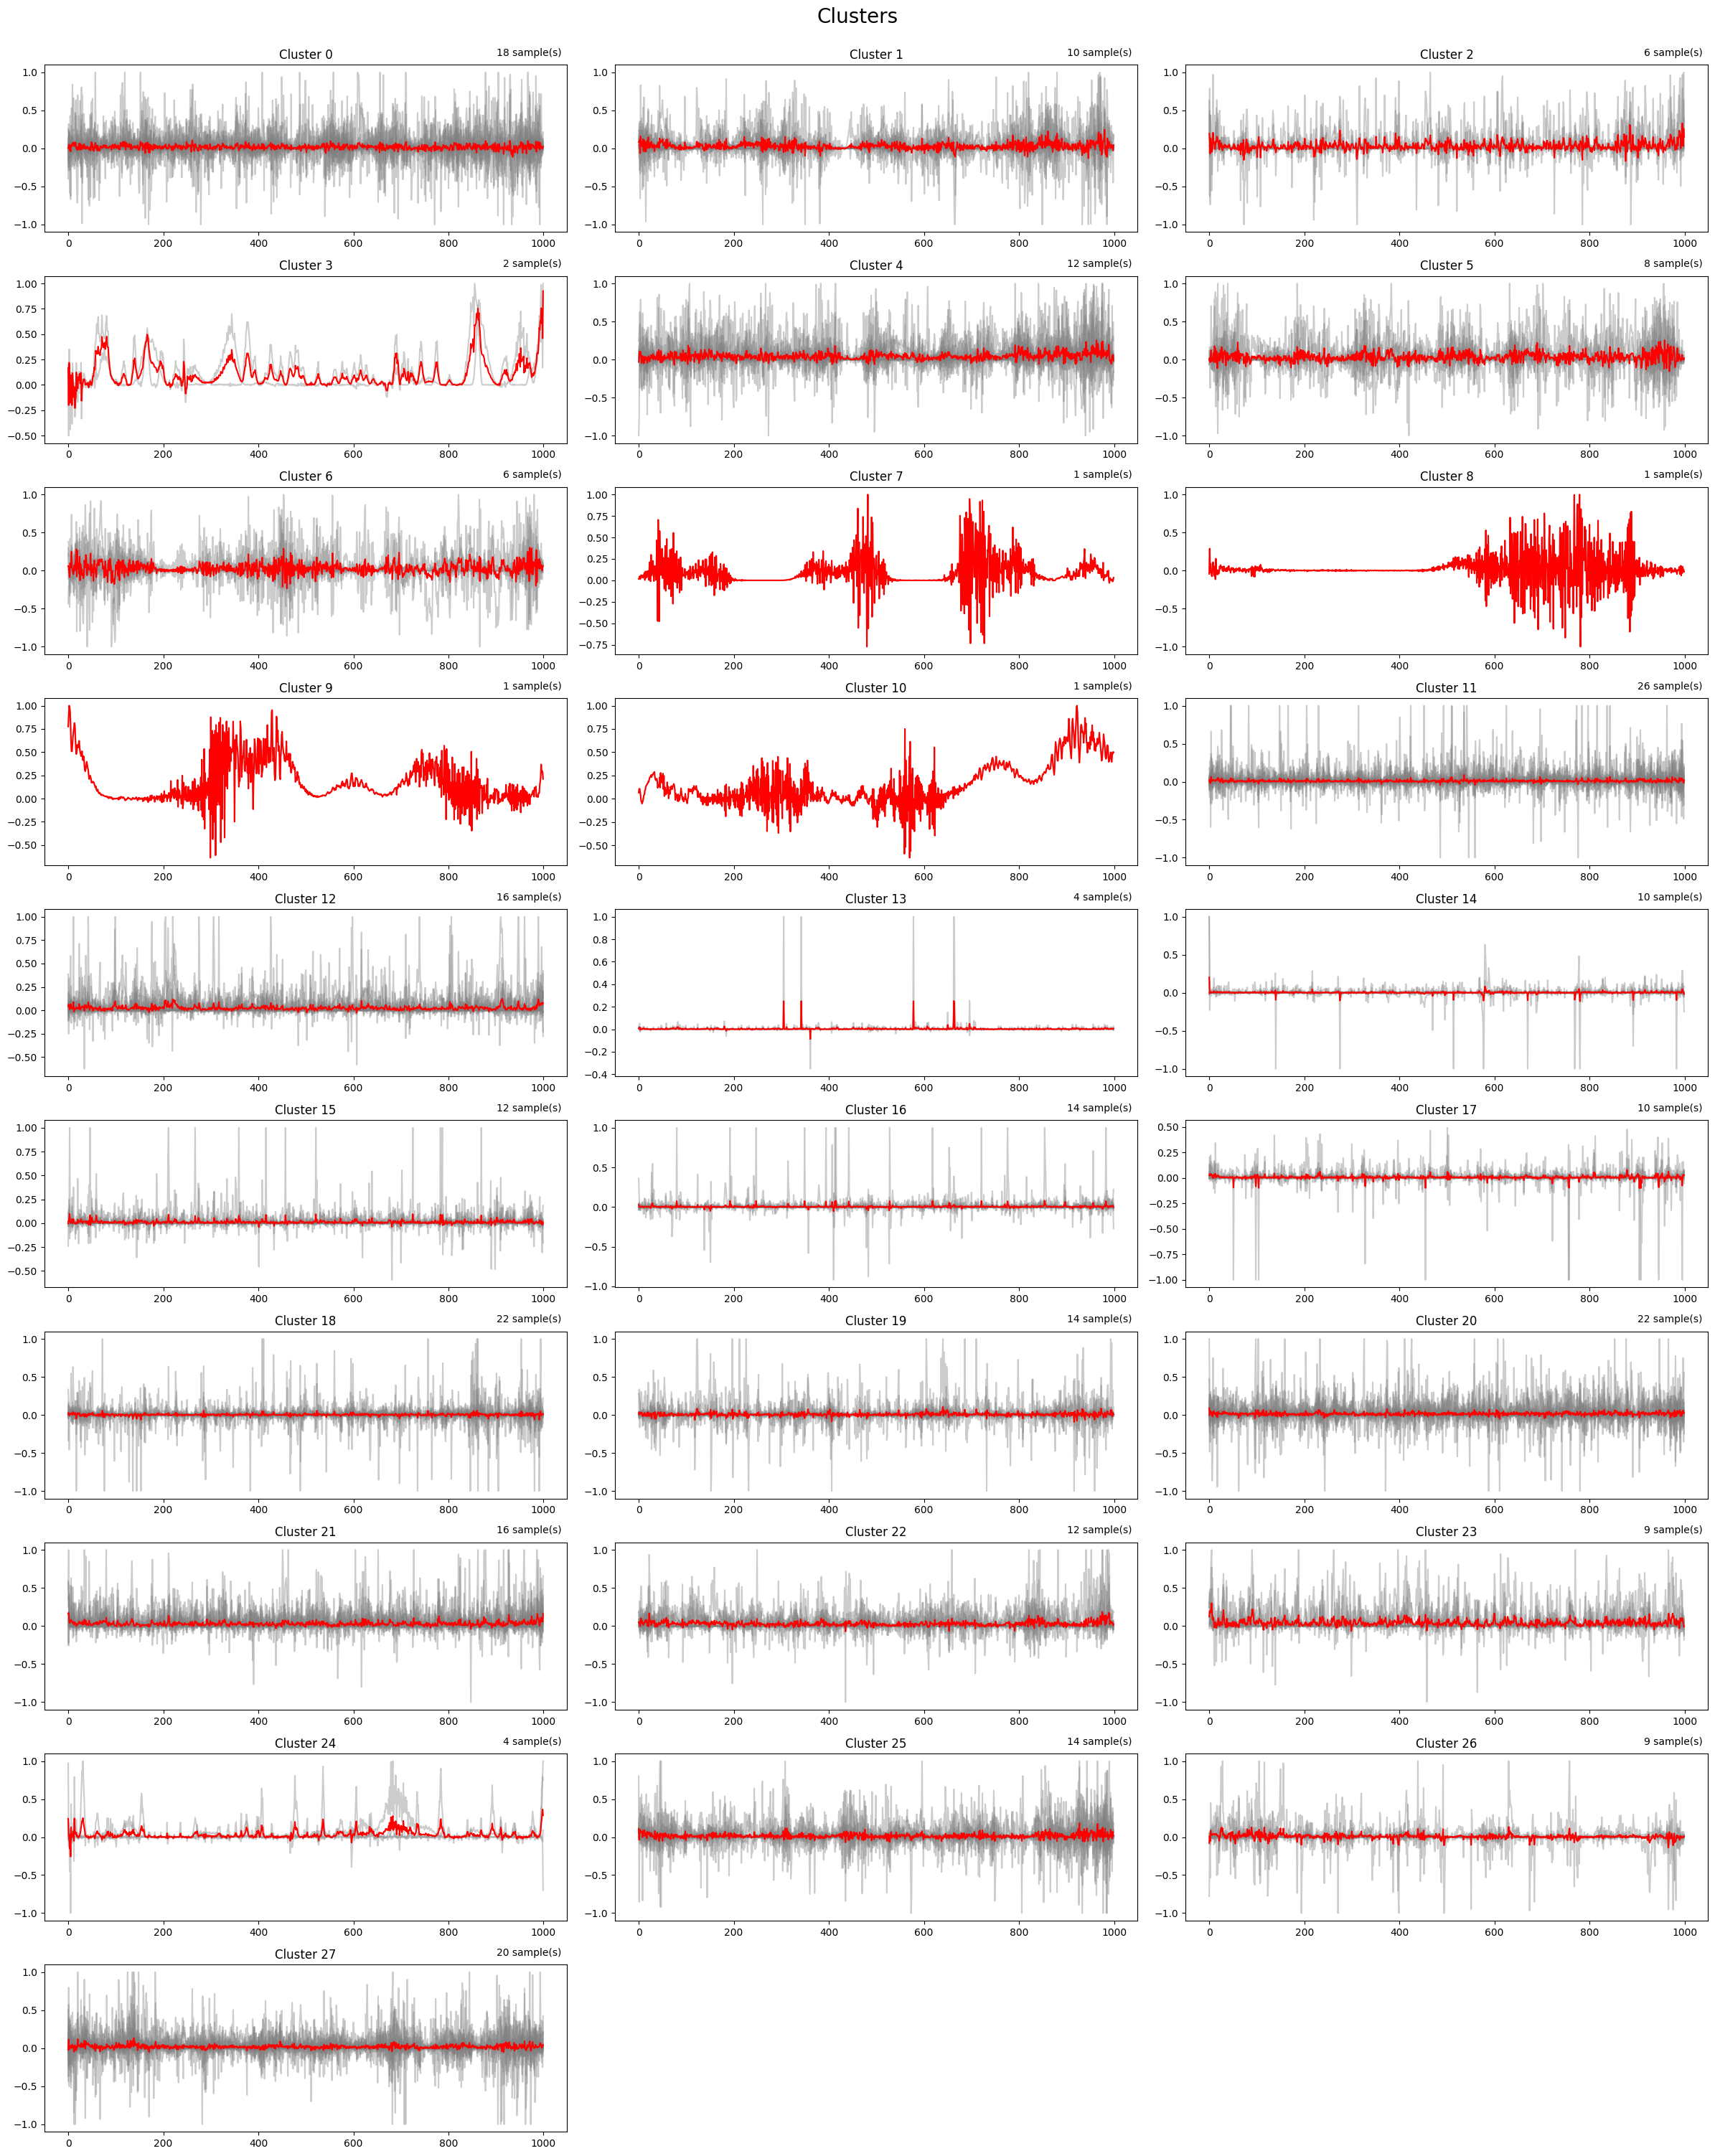

In [ ]:
plot_clusters(clusters, dataset)

### Gaussian Mixture Models (GMM)

In [35]:
from sklearn.mixture import GaussianMixture

In [36]:
# Flatten the time series data for GMM
n_samples, n_timestamps = dataset.shape
flattened_data = dataset.reshape(n_samples, -1)

# Define the GMM model
gmm = GaussianMixture(n_components=n_clusters, covariance_type="full", random_state=SEED)

# Fit the model
clusters = gmm.fit_predict(flattened_data)

# Output the cluster labels
print("Cluster labels:", clusters)

Cluster labels: [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  8  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 13  1  1  1  1  1 15  1  1  1  1  4  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 16  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  6
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 11  1  1  1  1  1  1  1 12  1  1  1  1  1  5  1  1  1 17  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 10  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  7  1  1  1  1  1  1
  9  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1
  1  1  1  1  1  1  1  1 14  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  3  1  1  1  1  1  1  1  1  1  1  1]


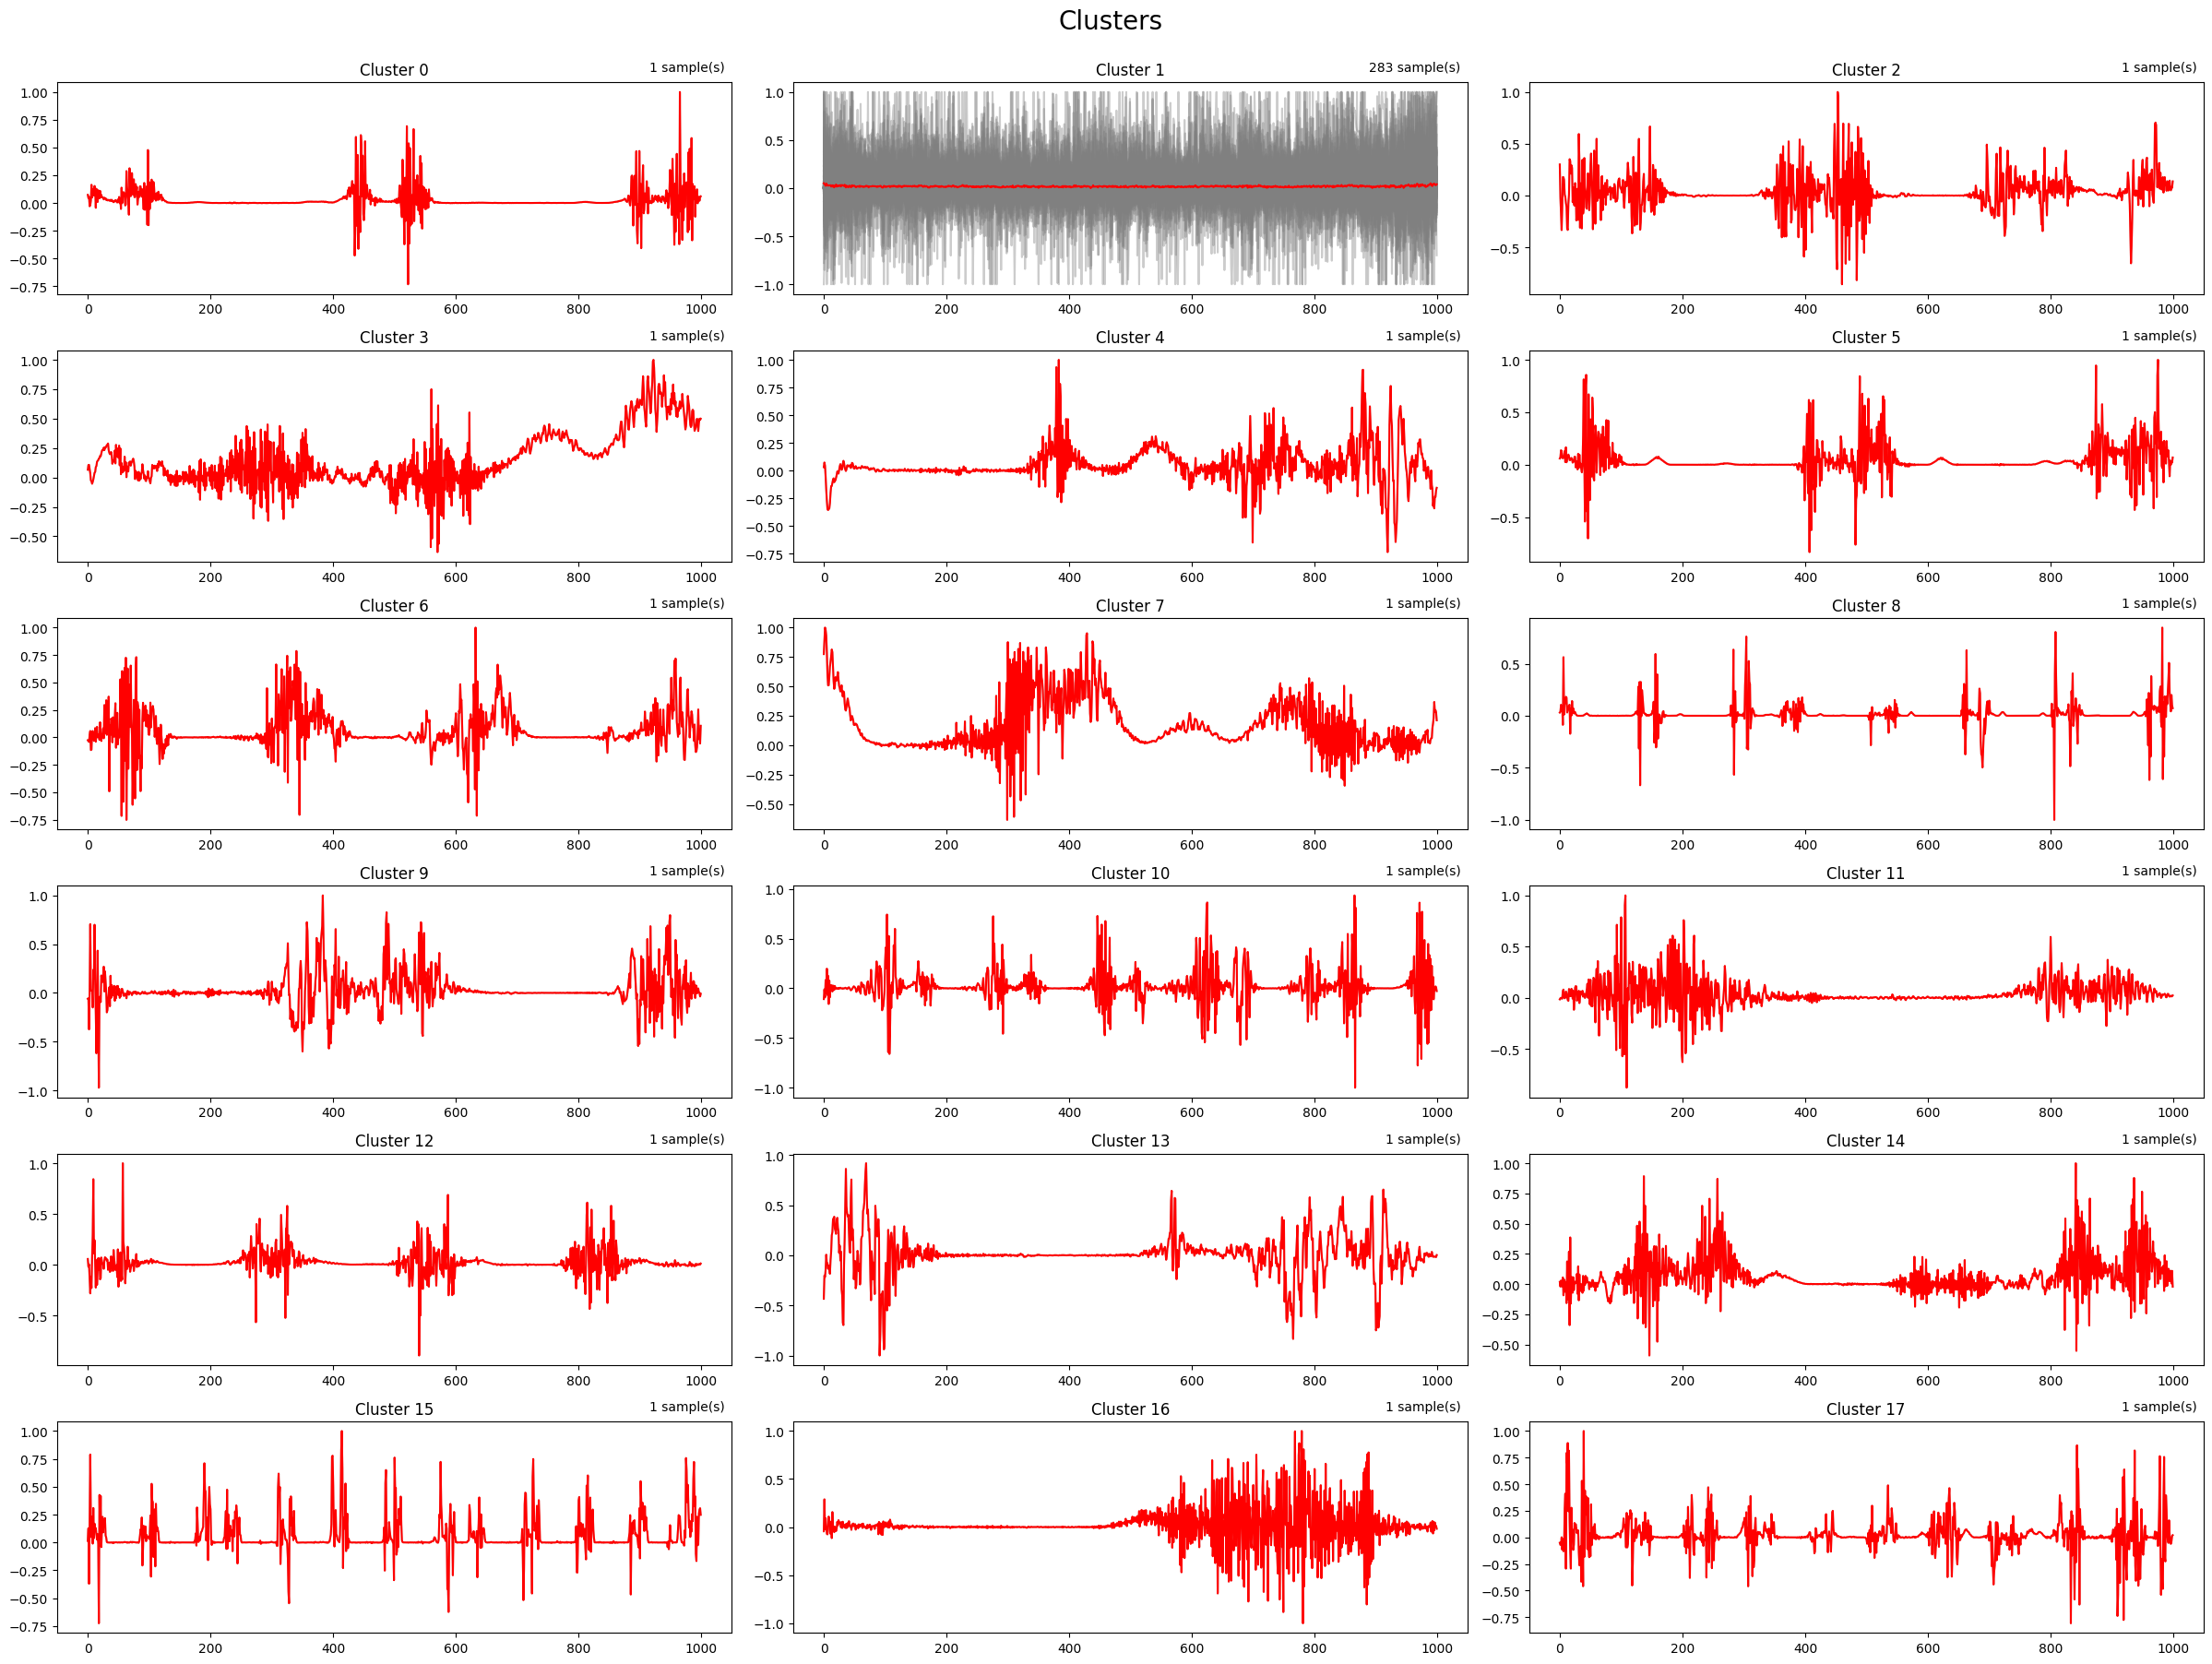

In [ ]:
plot_clusters(clusters, dataset)

### Shape-Based Clustering (K-Shape)

In [38]:
from tslearn.clustering import KShape

In [39]:
kshape = KShape(n_clusters=n_clusters, random_state=SEED)

# Fit the model
clusters = kshape.fit_predict(dataset)

# Output the cluster labels
print("Cluster labels:", clusters)

/home/hein_f0/dev/slki-code/.venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/hein_f0/dev/slki-code/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hein_f0/dev/slki-code/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hein_f0/dev/slki-code/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hein_f0/dev/slki-code/.ven

Cluster labels: [ 8  8  3  3  8  7  8 12 12 12  3  8  8  8  3  8 12  1 12  8  8  1  8  8
  8 12  3  3  3  3  3 12  3 12  8  3 12  8 12  8  3 12  8 12  7  3  8  4
  4  8 11  8  3  8 12  8  8  8  5  8  8  3  8  3 12  3  8 12 12 12  8 12
 12  8  8  3  3 12  3  3  8  6  8  8  3  3  3 13  8  3  8  8  8 12  3  8
 12  3  3  8  8  8 12  3 12  8 12 12  3  3 12  8  0  8  8 12  8  8 12  7
  8 12  8  8  4  3  3  8  7 12 14 12  3  8 15  3 12 12  2  3  3  3  8  8
  7  8 13  3 12  8  3 12  8 14  3  8 12  3  3  8  0  4  8 12 12  8 17 12
  8  8  3  8  8  3  8  3  3  3  8  3  8 12  8  6 12  8  3  7  8  9 12  3
  4  3  3  8  3  3  8 15  8  3  7  3  8  3 12 12  8  8  8 12 12 12 12  8
  3  8  8  3  8  8  3  3  3 12  8 12 12 12  3  8 12  7 16  3  3  8  8  8
  4 12  3 12  8 12  3  3  3 12 15 12  8  3  8  3  3 10  8 12  7  3  3  8
 12 12 12  3  8 12  8 16  7  8  3 12 12  3  3 12  8  8  3  3  3  8  8  3
  7  3  3 12  3 12  8  8  8  3 12  3]


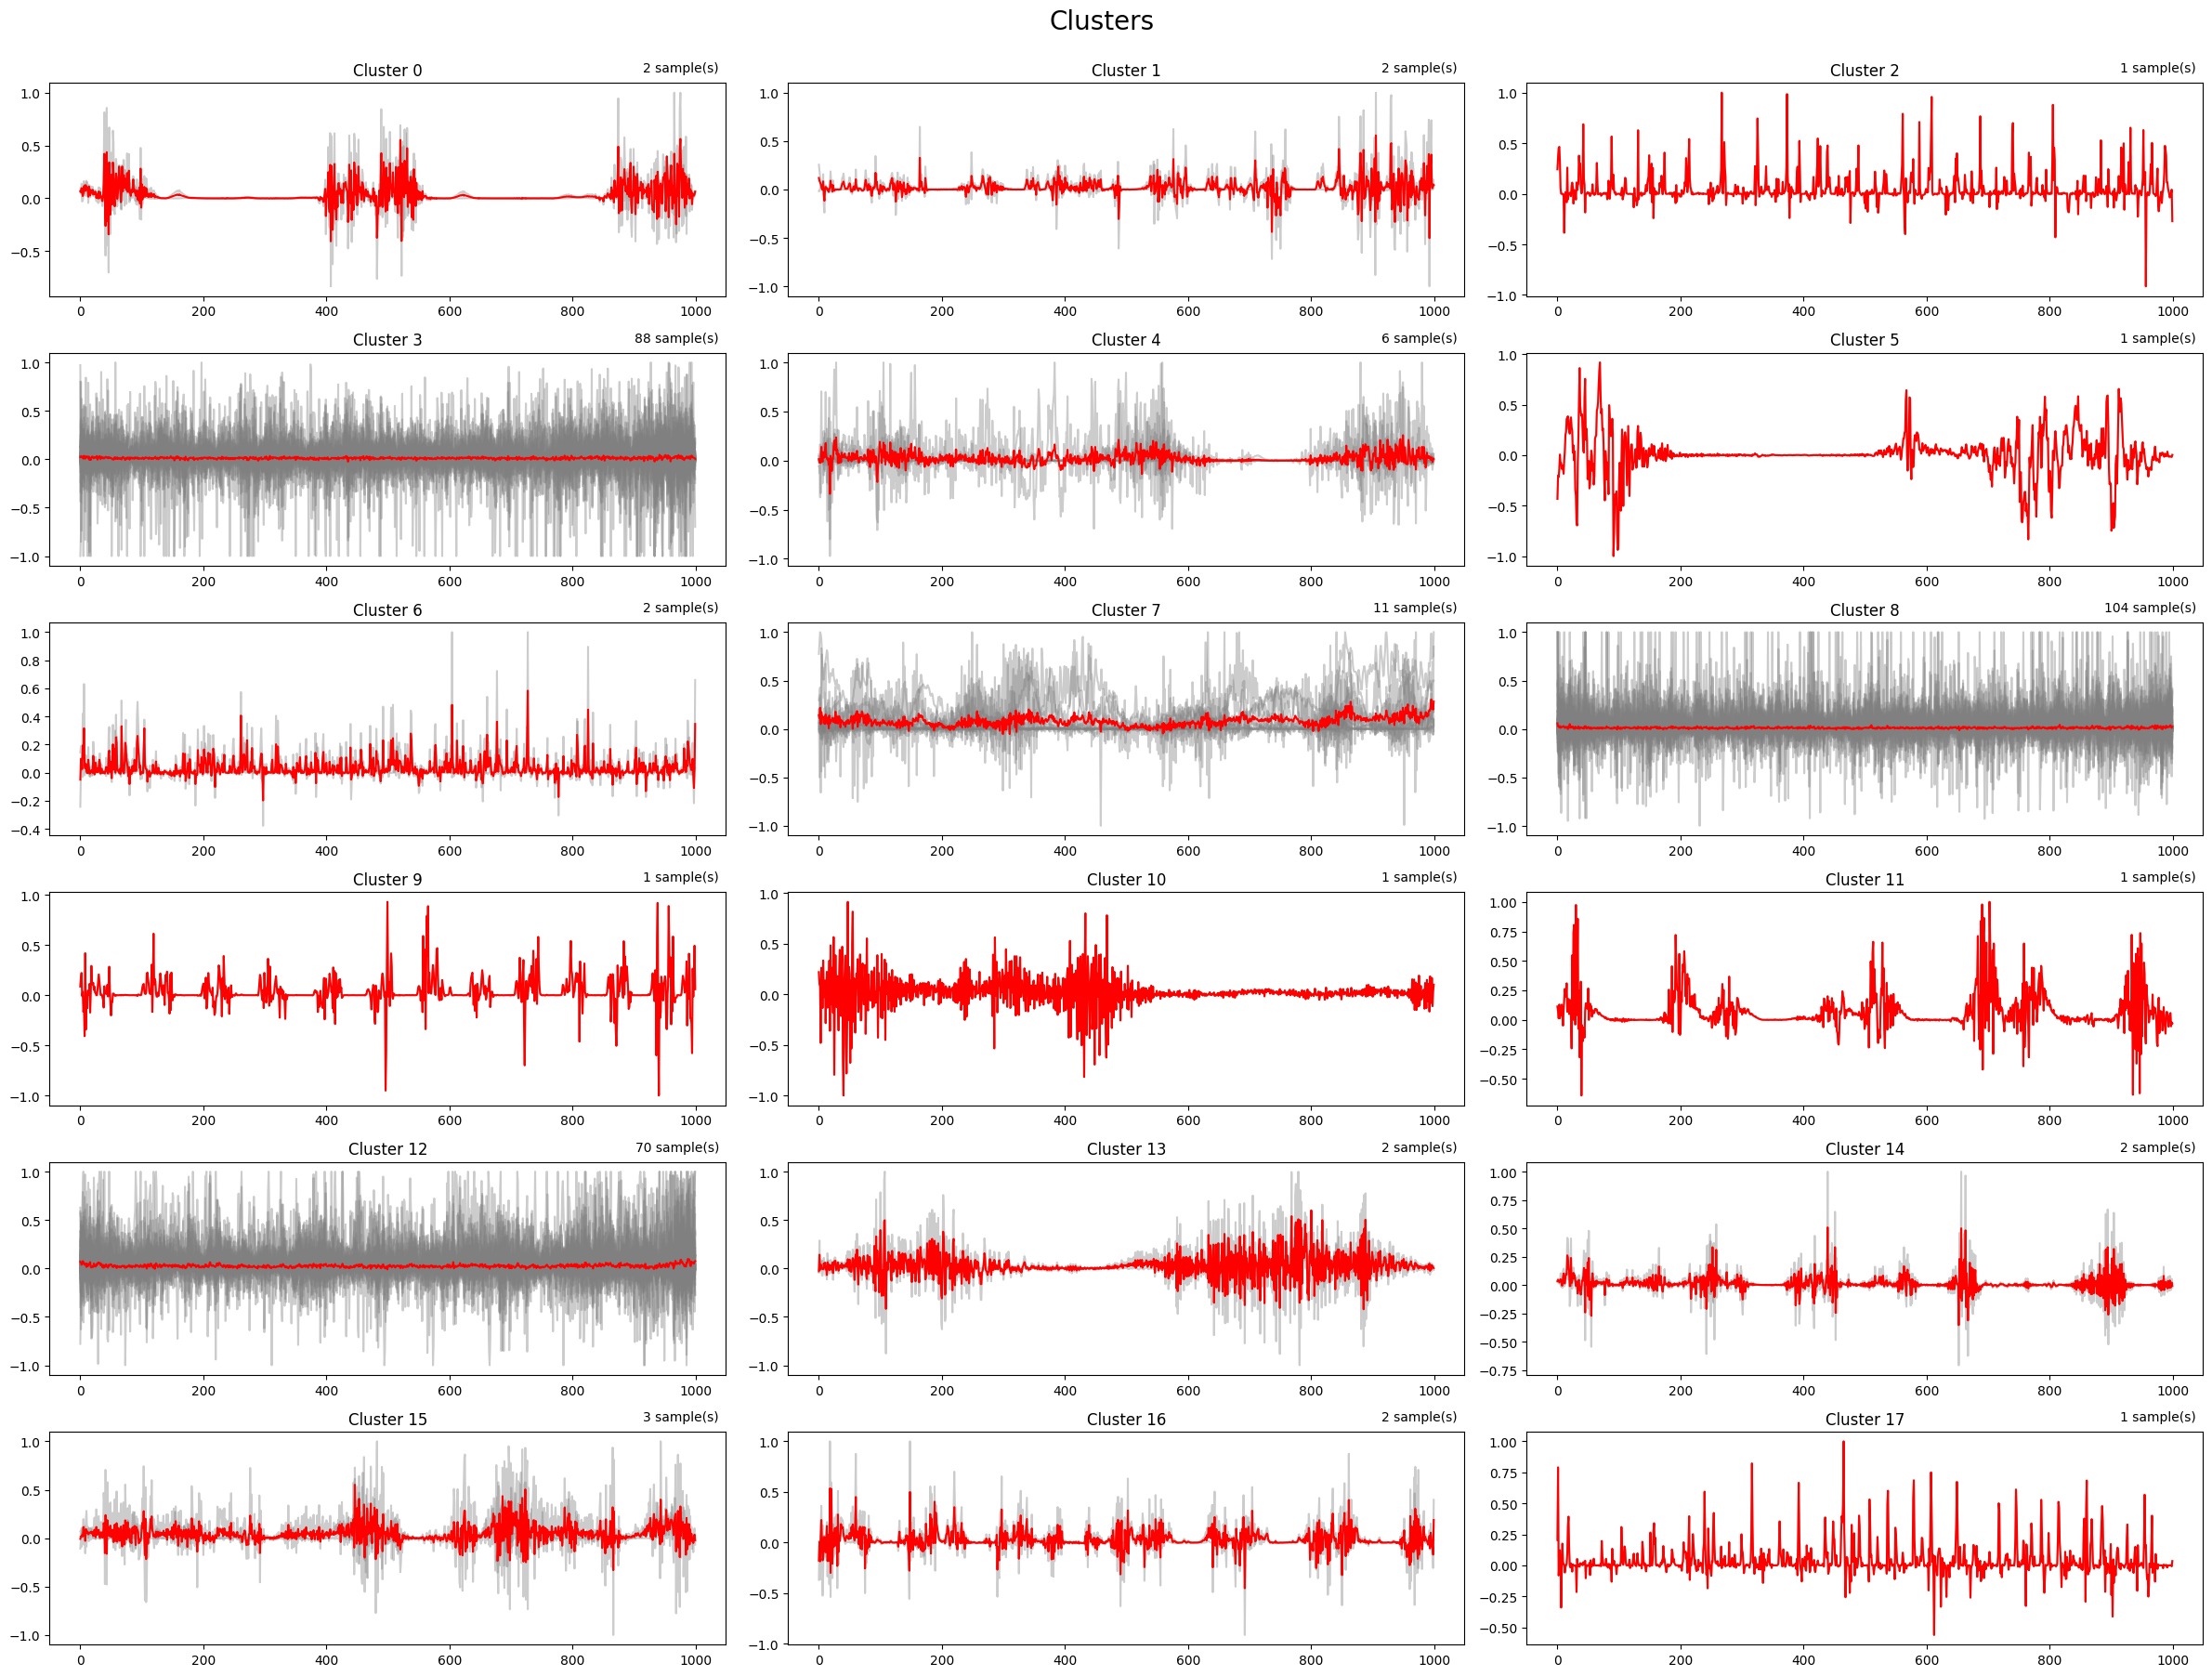

In [ ]:
plot_clusters(clusters, dataset)

### Spectral Clustering with DTW

In [41]:
from sklearn.cluster import SpectralClustering

In [42]:
# Define the Spectral Clustering model
spectral = SpectralClustering(n_clusters=n_clusters, affinity="precomputed", random_state=SEED, n_jobs=-1)

# Fit the model
clusters = spectral.fit_predict(distance_matrix)

# Output the cluster labels
print("Cluster labels:", clusters)

Cluster labels: [ 3 14  1  1  1  1  1 13  3 14  1  2 14  3 14  0 14 14  3 16  1 14  3 10
  3 14 13  3  3  3  3 14 14 13 13  1  3 14  1 13  1 14 14 14 14 14  3 13
 16  3 14 14  2 13 13  1 14 16  2 13  9 16 13 14 14  3 14  9  5 14 13 14
 14 14  2 11 14  3  3 14  1 14  3 14  2 14 14 14 14  3  9  1 13 14 13 16
  9  1 14  3  9 14 14 14  3 15 14  3  1  9 14 14 14 14 14  1  3  1  1 14
 13  3  0 14  1 14 14  1 13  1 16 14 14 14 14 14 14  1 14  3 14 14 14 13
 14  2  3 14  1  9 13  3 13 14  1  1 13 13  1  1 14 14  1 16 14  3  1  1
  1 13 14  1 14 14  1  2  3  3 16  3  3  1 11 14 14 14 14 11 13 14  2  7
  3 12 13  2  1 16 16 14 13  3  2 16 13  1  9  1  1  1 14 13  3 14  3 14
  1  4 14  1  2  1 14  1  1  1 16 14 14  1  8  3 14  3 14  2 14 13 14 14
 14  1 14  2 13 14  3  3 16 14 14 14 14  2  9  3 14 14 14 14 16  1 13 13
 13  3  1 11 13  3 13 14 14 11 16 14 14  3  3  2  3 14  3  3 13 13  6  3
 17 14  2 13  1 13  1  3  1  3 13 14]


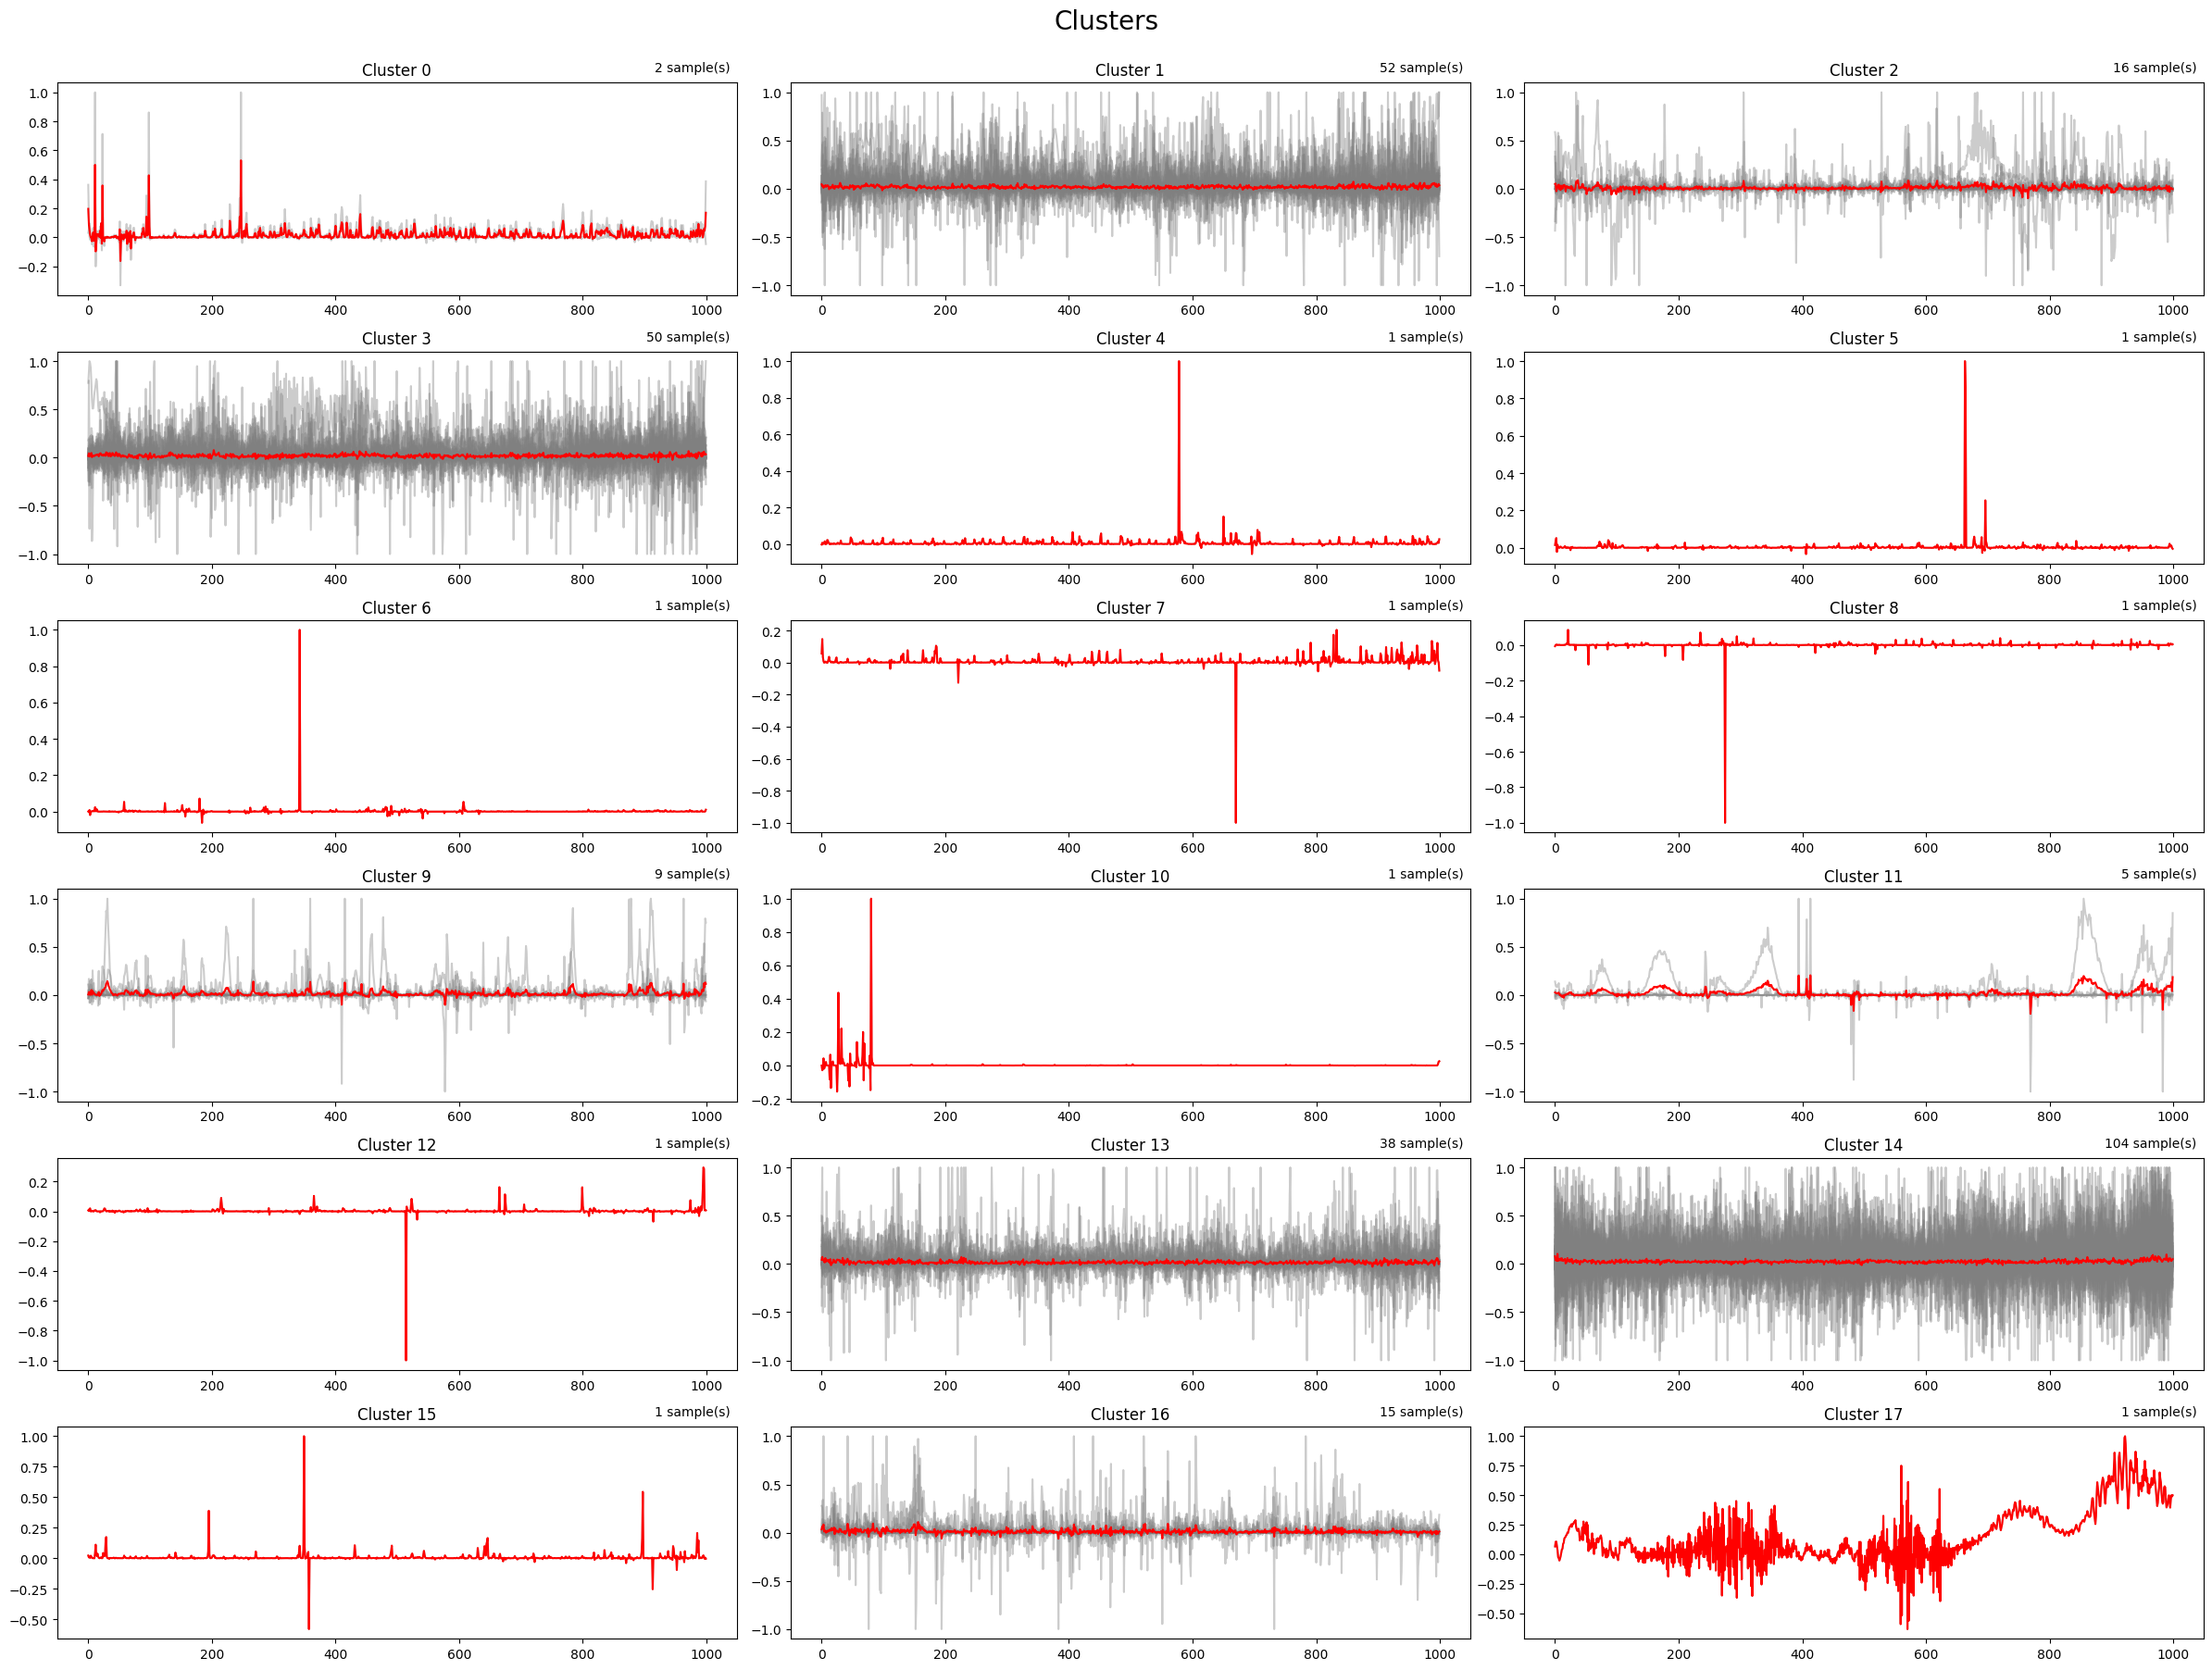

In [ ]:
plot_clusters(clusters, dataset)